# Visualizing Success

Sometimes you just gotta see it to believe it.

In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
dict_path = "../smol_truth/smol_dict.pkl"
with open(dict_path, 'rb') as dict_file:
    smol_dict = pickle.load(dict_file)

In [3]:
sensor_path = "../smol_truth/sensors.csv"
with open(sensor_path) as sensor_file:
    sensors = pd.read_csv(sensor_file)

In [4]:
sensors.head()

,sensor ID,x (m),y (m),radius (m)
0,0,231.2663,120.1813,11.131326
1,1,371.8589,238.2076,11.634567
2,2,757.0289,350.5063,15.115731
3,3,190.9400,140.1613,13.697470
4,4,663.1340,522.3010,14.227241


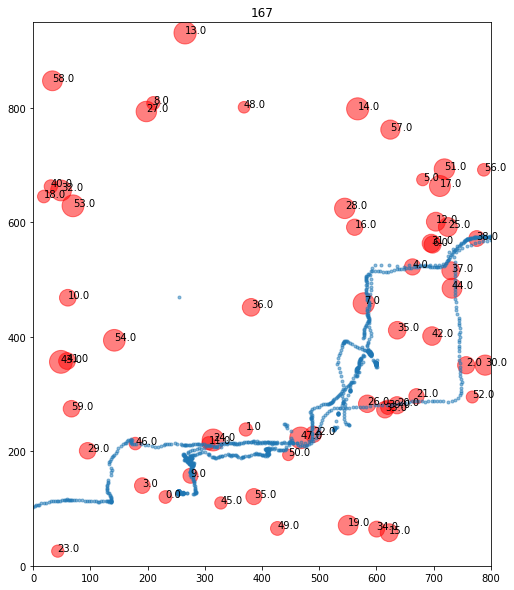

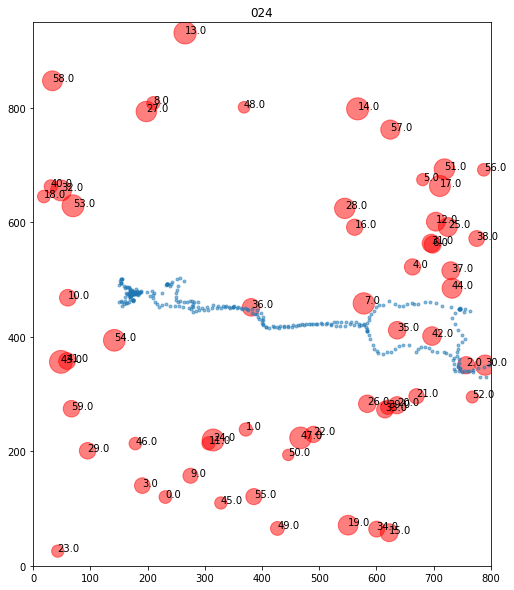

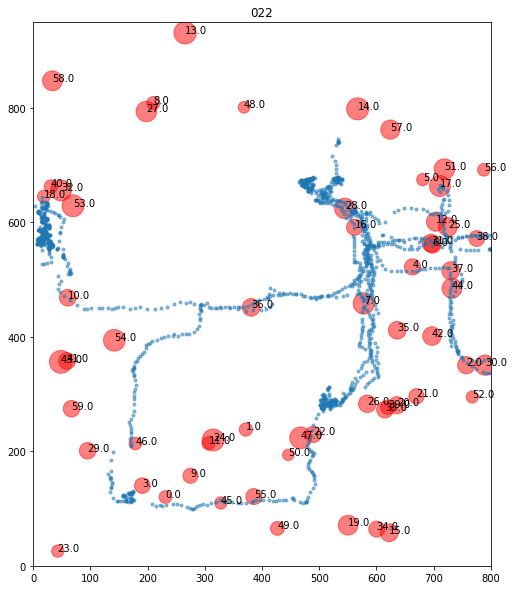

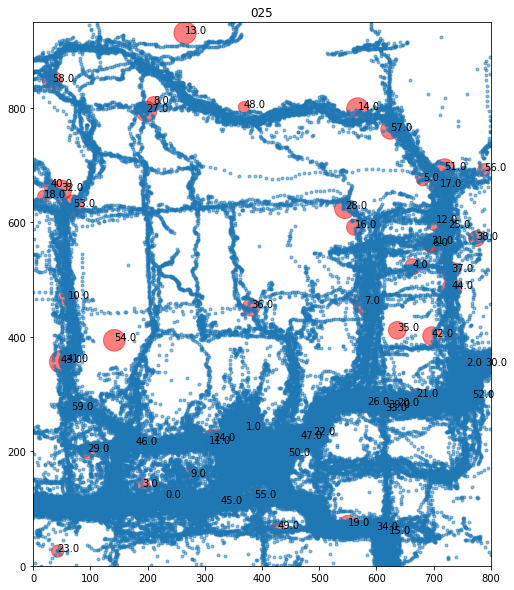

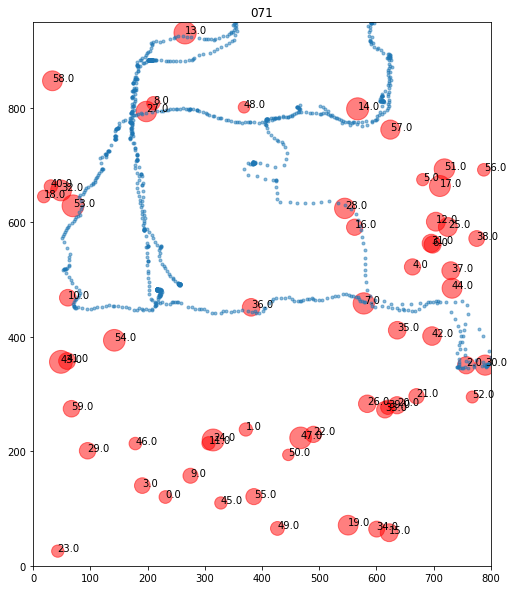

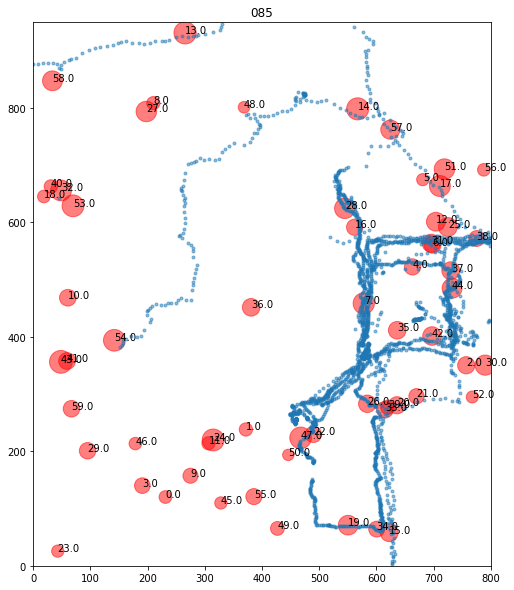

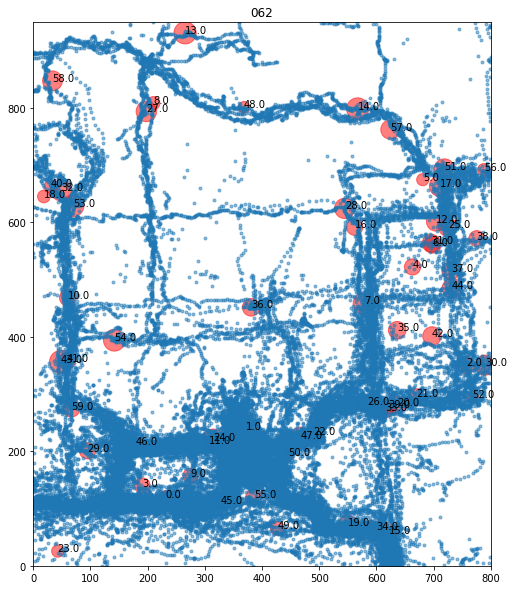

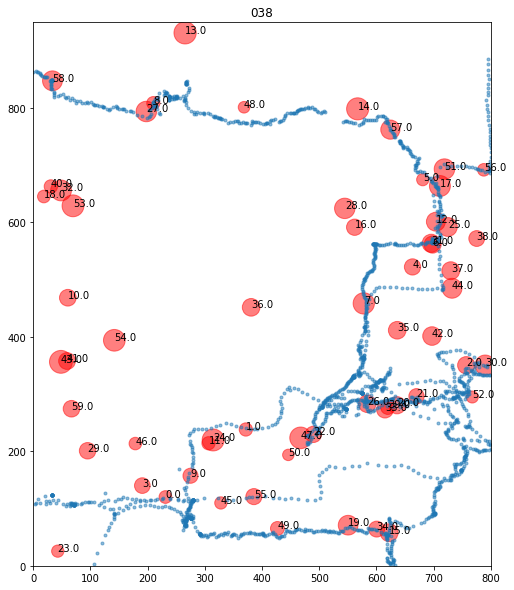

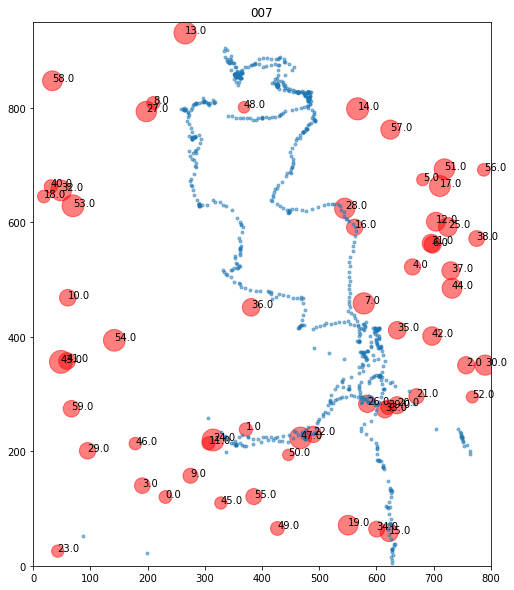

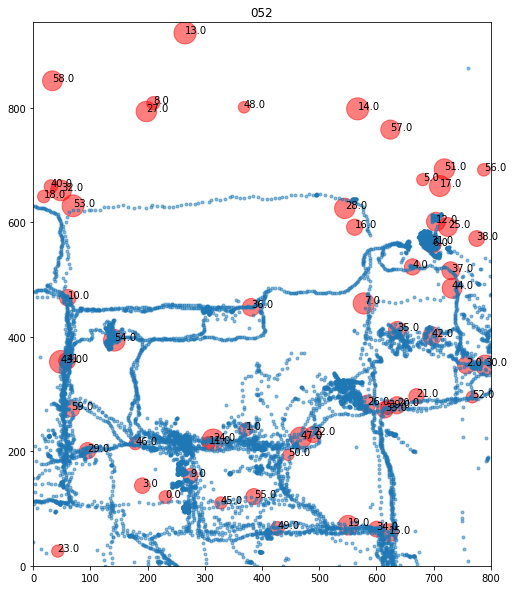

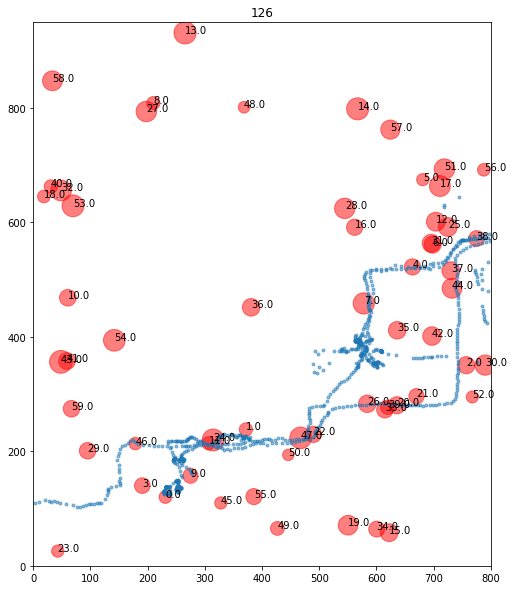

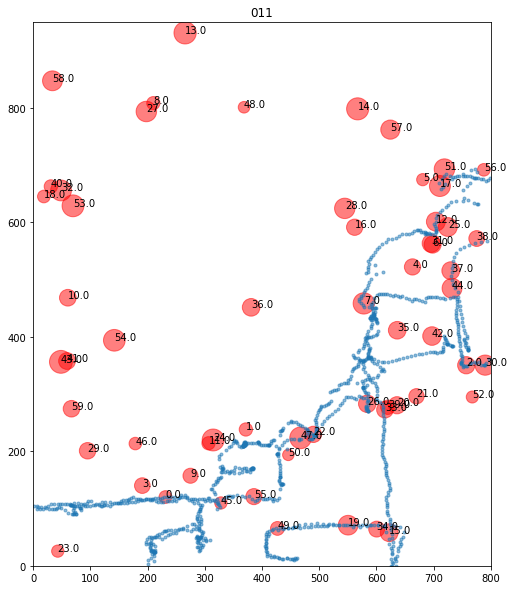

In [5]:
for person_id in smol_dict:
    plt.figure(figsize=(18,10))
    plt.title(person_id)
    plt.xlim([0, 800])
    plt.ylim([0, 950])
    plt.gca().set_aspect("equal")
    plt.plot(smol_dict[person_id]['x'], smol_dict[person_id]['y'], ".", alpha=0.5)
    
    ax = plt.gcf().gca()
    for index, row in sensors.iterrows():
        ax.add_patch(plt.Circle((row['x (m)'], row['y (m)']), row['radius (m)'], alpha=0.5, color='r'))
        plt.text(row['x (m)'], row['y (m)'], row['sensor ID'])
    
    plt.show()

NameError: name 'seen_gateways' is not defined

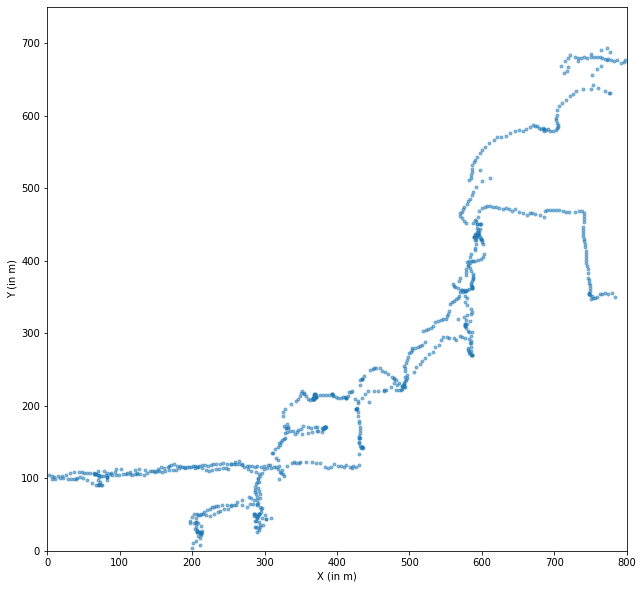

In [6]:
person_id = '011'

plt.figure(figsize=(18,10))
plt.xlabel('X (in m)')
plt.ylabel('Y (in m)')
plt.xlim([0, 800])
plt.ylim([0, 750])
plt.gca().set_aspect("equal")
plt.plot(smol_dict[person_id]['x'][:850], smol_dict[person_id]['y'][:850], ".", alpha=0.5)

ax = plt.gcf().gca()
for index, row in sensors.iterrows():
    if index in seen_gateways:
        ax.add_patch(plt.Circle((row['x (m)'], row['y (m)']), row['radius (m)'], alpha=0.5, color='r'))
        plt.text(row['x (m)'], row['y (m)'], row['sensor ID'])

plt.show()

In [7]:
np.sum(smol_dict[person_id]['norm_secs'].to_numpy() < 1500)

406

In [8]:
smol_dict[person_id]['norm_secs'].iloc[410]

1517.4999925098389

In [9]:
truth = pd.read_csv('../smol_sim/mules/011.csv')
truth.head()

,sensor ID,norm_secs (secs),time (days)
0,51,49.714156,39746.348237
1,51,50.414355,39746.348246
2,51,51.114555,39746.348254
3,51,51.814754,39746.348262
4,51,52.514953,39746.348270


In [10]:
smol_dict[person_id].head()

,latitude,longitude,time,time_diff,cap_diff,norm_time,x,y,norm_secs
48205,39.991687,116.307008,39746.347662,NaN,0.000000,0.000000,797.9213,677.2126,0.000000
48206,39.991657,116.306987,39746.347697,0.000035,0.000035,0.000035,795.5126,673.8826,3.000007
48207,39.991652,116.306955,39746.347731,0.000035,0.000035,0.000069,791.9939,673.3276,6.000005
48208,39.991680,116.306902,39746.347766,0.000035,0.000035,0.000104,786.0776,676.4689,9.000003
48209,39.991678,116.306868,39746.347801,0.000035,0.000035,0.000139,782.3813,676.2913,12.000001


In [11]:
np.sum(truth['norm_secs (secs)'].to_numpy() < 2940)

547

In [12]:
seen_gateways = truth['sensor ID'][:547].unique()
seen_gateways

array([51, 17, 12, 31,  7, 26, 22, 47, 45,  0, 55, 44,  2, 30])

In [13]:
seen_gateways = truth['sensor ID'][:410].unique()
seen_gateways

array([51, 17, 12, 31,  7, 26, 22, 47, 45,  0, 55])

In [14]:
len(truth)

720

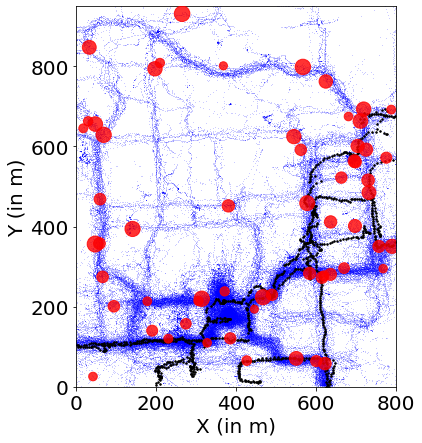

In [31]:
plt.figure(figsize=(15,7))
plt.xlabel('X (in m)')
plt.ylabel('Y (in m)')
plt.xlim([0, 800])
plt.ylim([0, 950])
plt.gca().set_aspect("equal")

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=18)
plt.rc('axes', labelsize=20)  
plt.rc('figure', titlesize=20)

for person_id in smol_dict:
    if person_id=='011':
        #plt.plot(smol_dict[person_id]['x'], smol_dict[person_id]['y'], 'w.', alpha=0.8, markersize=4, linewidth=1.5, zorder=3)
        plt.plot(smol_dict[person_id]['x'], smol_dict[person_id]['y'], 'k.', markersize=3, linewidth=1.5, zorder=2)
    else:
        plt.plot(smol_dict[person_id]['x'], smol_dict[person_id]['y'], "b,", alpha=0.2, zorder=1)
    
ax = plt.gcf().gca()
for index, row in sensors.iterrows():
    ax.add_patch(plt.Circle((row['x (m)'], row['y (m)']), row['radius (m)'], alpha=0.8, color='red', zorder=3))
    #plt.text(row['x (m)'], row['y (m)'], row['sensor ID'])


plt.savefig('smol_data.pdf')
plt.show()


# 